# Data Scientist Associate Practical Exam Submission

David Galera.


## Task 1 
The dataset contains **1500 rows** and **8 columns**. I have validated all the columns against the criteria in the dataset table:
- booking_id: No missing values, 1500 unique identifiers. I have changed the dtype to categorical nominal.
- month_as_member: Same as description, without missing values.
- weight: 20 missing values, so I replaced the missing values with the mean.
- days_before: String type column without missing values, some values contain additional characters. I have extracted only the numerical values and I have converted the column type to *int*.
- day_of_week: No missing values, I have replaced values ['Wednesday', 'Fri.','Monday'] with the correct string and I have converted the column dtype to categorical ordinal.
- time: No missing values, I have converted the column dtype to categorical ordinal.
- category: 13 missing values represented with the '-' string, so I replace them with the string 'unknown'. I have converted the column dtype to categorical nominal.
- attended: No missing values, I have converted the column dtype to categorical nominal.

In [1]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
fitness_class_2212 = pd.read_csv('fitness_class_2212.csv')
fitness_class_2212.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [2]:
fitness_class_2212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


### Convert booking_id column to nominal

In [3]:
fitness_class_2212['booking_id']=fitness_class_2212['booking_id'].astype('category')
fitness_class_2212['booking_id'].dtype

CategoricalDtype(categories=[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
                  ...
                  1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500],
, ordered=False)

### Impute missing values in weight column

In [4]:
fitness_class_2212['weight'].fillna(value=round(fitness_class_2212['weight'].mean(),2), inplace=True)

### Clean days_before column

In [5]:
fitness_class_2212.days_before.unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [6]:
fitness_class_2212['days_before'] = fitness_class_2212['days_before'].str\
.extract('(\d+)', expand=False)

In [7]:
fitness_class_2212['days_before']=fitness_class_2212['days_before'].astype('int')

In [8]:
fitness_class_2212.days_before.unique()

array([ 8,  2, 14, 10,  6,  4,  9, 12,  5,  3,  7, 13, 20,  1, 15, 11, 16,
       17, 29])

### Clean and change dtype of day_of_week column

In [9]:
fitness_class_2212['day_of_week'].value_counts()

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64

In [10]:
fitness_class_2212['day_of_week'] = fitness_class_2212['day_of_week']\
.replace(['Wednesday', 'Fri.','Monday'], ['Wed','Fri','Mon'])

In [11]:
fitness_class_2212['day_of_week'].value_counts()

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [12]:
fitness_class_2212['day_of_week']=pd.Categorical(fitness_class_2212['day_of_week'], categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ordered=True)

In [13]:
fitness_class_2212['day_of_week'].dtype

CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

### Convert time column to ordinal

In [14]:
fitness_class_2212['time']=pd.Categorical(fitness_class_2212['time'], categories=['AM','PM'], ordered=True)

In [15]:
fitness_class_2212['time'].dtype

CategoricalDtype(categories=['AM', 'PM'], ordered=True)

### Replace missing values of category column with 'unknown' and convert it to nominal

In [16]:
fitness_class_2212['category'].value_counts()

HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64

In [17]:
fitness_class_2212['category'] = fitness_class_2212['category']\
.replace(['-'], ['unknown'])

In [19]:
fitness_class_2212['category']=fitness_class_2212['category'].astype('category')
fitness_class_2212['category'].dtype

CategoricalDtype(categories=['Aqua', 'Cycling', 'HIIT', 'Strength', 'Yoga', 'unknown'], ordered=False)

### Convert attended column to nominal

In [20]:
fitness_class_2212['attended']=fitness_class_2212['attended'].astype('category')
fitness_class_2212['attended'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [21]:
fitness_class_2212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   category
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(5), float64(1), int64(2)
memory usage: 88.9 KB


## Task 2
From **Bookings NOT attended vs attended** the category "NOT attended" (0) has the most observations. The attended variable is imbalanced since the "NOT attended" (0) category has more than twice as many observations as the "attended" (1) category.

[Text(0.5, 1.0, 'Graph 1 Bookings NOT attended vs attended')]

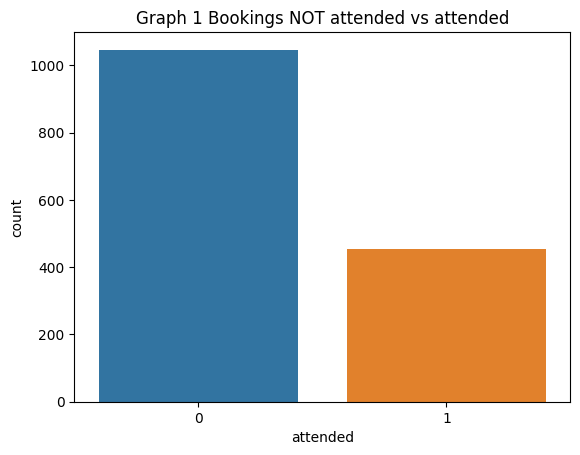

In [22]:
sns.countplot(x=fitness_class_2212['attended']).set(title='Graph 1 Bookings NOT attended vs attended')

## Task 3
From **Graph 2-1 Distribution of months as a member** we can see a right skewed shape with some outliers, having the most extreme of them a value of 148. We can apply a log transformation to mitigate the skewness of the distribution. From **Graph 2-2**, we can see the distribution is much closer to a normal distribution.

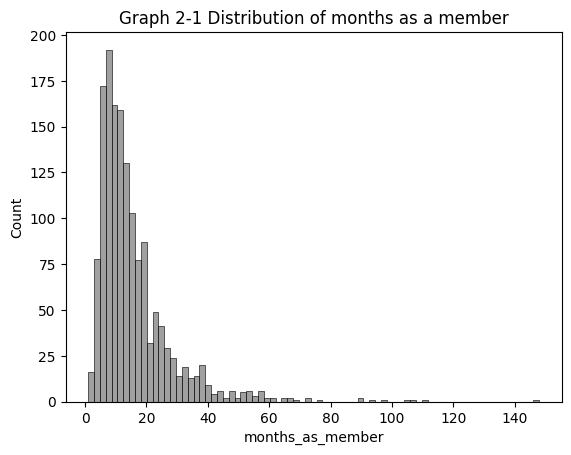

In [23]:
sns.histplot(x=fitness_class_2212['months_as_member'],color='gray').set(title='Graph 2-1 Distribution of months as a member');

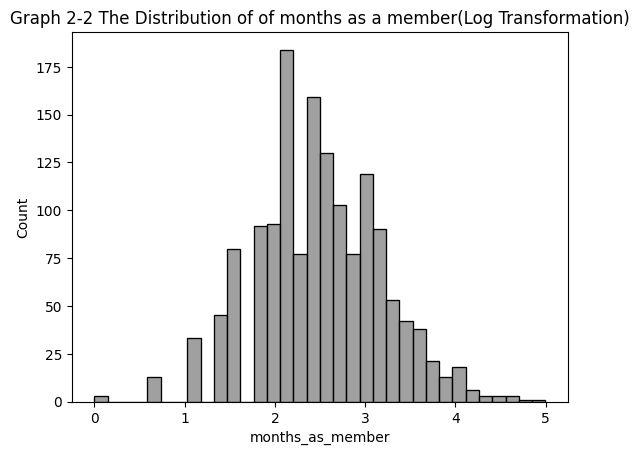

In [24]:
sns.histplot(x=np.log(fitness_class_2212['months_as_member']),color='gray').set(title='Graph 2-2 The Distribution of of months as a member(Log Transformation)');

## Task 4
From **Graph 3-1 The Boxplot between Months as a member and attended**, we can see how members with higher number of months as a member tend to attend the class. The median amount of months as a member for the bookings who did attend the class is 20 while for the bookings which did not attend is 10. Every booking with more than 60 months as a member has attended to class.

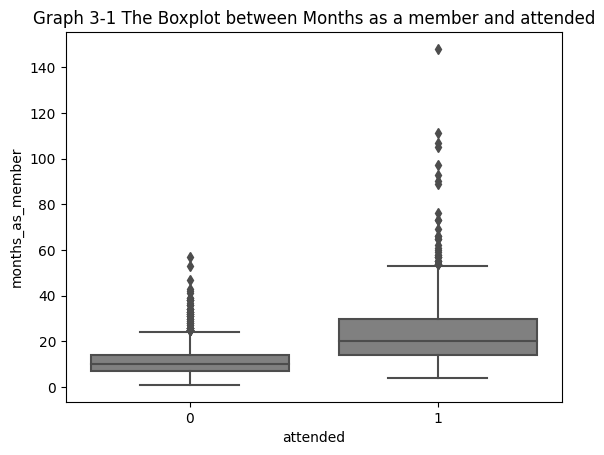

In [25]:
sns.boxplot(data=fitness_class_2212, y='months_as_member',x='attended',color='gray')\
.set(title='Graph 3-1 The Boxplot between Months as a member and attended');

## Task 5
Predict if a member will attend the class or not is a **classification problem** in machine learning. It is a **binary classification problem** since the target variable has only **2 possible outputs**.

## Task 6
Baseline Model - Naive Bayes

### Format the data

First we apply a log transformation to 'months_as_member' variable to remove skewness, then we split the data into  dependent variables and target variable. We don't use the **booking_id** column since it doesn't have information about the target and any boost in performance would be because of randomness.

In [26]:
fitness_class_2212['months_as_member']=np.log(fitness_class_2212['months_as_member'])

In [27]:
X = fitness_class_2212.iloc[:, 1:-1]
y = fitness_class_2212.iloc[:, -1]

In [28]:
X_onehot = pd.get_dummies(X, columns=['day_of_week','time','category'],drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score

In [30]:
# Split dataset into 70% training set and 30% test set
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred_gb =gb.predict(X_test)

## Task 7
Comparision Model - Decision Tree Classifier Model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt =dt.predict(X_test)

## Task 8
I am choosing the **Naive Bayes Classifier** because it is a simple model which doesn't require the data to be normalized, is efficient to train and generally produces good results. The comparision model I am choosing is the **Decision Tree Classifier** because tree models can capture non-linear relationships between explanatory variables and the target variable very accurately. 

## Task 9
I am choosing **accuracy** to evaluate the total number of correct predictions but because of the target is imbalanced I'm also computing the **recall** to evaluate the performance predicting the minority class (1).

In [34]:
gb_acc = accuracy_score(y_test, y_pred_gb)
gb_rec = recall_score(y_test, y_pred_gb)
print(gb_acc,gb_rec)

0.6977777777777778 0.7058823529411765


In [35]:
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_rec = recall_score(y_test, y_pred_dt)
print(dt_acc,dt_rec)

0.6866666666666666 0.5661764705882353


## Task 10
A higher **accuracy** means that the model yields a higher percentatge of correct predictions, a higher **recall** means the model produces few false negatives. I would choose the **Naive Bayes Classifier** because its accuracy is a bit higher and its recall is much higher. 